In [1]:
import pandas as pd
import numpy as np
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
import xgboost as xgb
import catboost as cb
import lightgbm as lgb
import matplotlib.pyplot as plt

In [2]:
# 定义文件序号列表
sizes = [128, 256, 512, 1024, 2048, 4096]
snr_list = [-10, -5, 0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50]
# 初始化字典存储每个算法的准确度
accuracies = {alg: [] for alg in ['XGBoost', 'LightGBM', 'CatBoost', 'GBDT', 'RF', 'DT', 'SVM', 'Naive Bayes', 'KNN']}
# 定义每个算法的模型实例
models = {
    'XGBoost': xgb.XGBClassifier(eval_metric='logloss'),
    'LightGBM': lgb.LGBMClassifier(verbose=0, force_row_wise=True),
    'CatBoost': cb.CatBoostClassifier(verbose=0),
    'GBDT': GradientBoostingClassifier(),
    'RF': RandomForestClassifier(),
    'DT': DecisionTreeClassifier(),
    'SVM': SVC(kernel="linear", decision_function_shape="ovo", max_iter=100000),
    'Naive Bayes': GaussianNB(),
    'KNN': KNeighborsClassifier(n_neighbors=5, weights='distance', algorithm='kd_tree', leaf_size=10, p=1, n_jobs=-1)
}
# 定义标识点
markers = {
    'XGBoost': 'o',  # 圆圈
    'LightGBM': 'D',  # 菱形
    'CatBoost': 's',  # 方块
    'GBDT': 'p',  # 五角星
    'RF': 'v',  # 下三角
    'DT': '*',
    'SVM': '>',  # 右三角
    'Naive Bayes': '<',  # 左三角
    'KNN': '^'  # 上三角
}
file_path_train = []
file_path_test  = []
# 循环遍历每个文件序号，并加载相应的 CSV 文件
for size in sizes:
    file_path_train.append(f'../preprocessed/combined_features_{size}.csv')
    file_path_test.append(f'../preprocessed/combined_features_{size}_test.csv')

In [3]:
# 初始化字典存储X_train和y_train数据集
X_trains = {}
y_trains = {}
X_tests = {}
y_tests = {}
# 循环处理每个文件
for size, file_path in zip(sizes, file_path_train):
    # 读取数据集
    df = pd.read_csv(file_path)
    # 打乱数据集
    df = shuffle(df, random_state=42)
    # 分离标签和特征
    y_trains[size] = df['label']
    X_trains[size] = df.drop('label', axis=1)
for size, file_path in zip(sizes, file_path_test):
    # 读取数据集
    df = pd.read_csv(file_path)
    # 打乱数据集
    df = shuffle(df, random_state=42)
    # 分离标签和特征
    y_tests[size] = df['label']
    X_tests[size] = df.drop('label', axis=1)

In [4]:
# 训练模型并评估准确度
for size in sizes:
    X_train = X_trains[size]
    X_test  = X_tests [size]
    y_train = y_trains[size]
    y_test  = y_tests [size]
    print(f"Results for data size {size}:")
    for alg, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        accuracies[alg].append(accuracy)
        print(f"{alg}: Accuracy = {accuracy:.4f}")
# accuracies.sort()


Results for data size 128:
XGBoost: Accuracy = 0.9397
LightGBM: Accuracy = 0.9390
CatBoost: Accuracy = 0.9377
GBDT: Accuracy = 0.9257
RF: Accuracy = 0.9370
DT: Accuracy = 0.9015


d:\Anaconda3\envs\bt\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM: Accuracy = 0.5118
Naive Bayes: Accuracy = 0.6643
KNN: Accuracy = 0.4920
Results for data size 256:
XGBoost: Accuracy = 0.9670
LightGBM: Accuracy = 0.9650
CatBoost: Accuracy = 0.9670
GBDT: Accuracy = 0.9495
RF: Accuracy = 0.9605
DT: Accuracy = 0.9230


d:\Anaconda3\envs\bt\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM: Accuracy = 0.6135
Naive Bayes: Accuracy = 0.7117
KNN: Accuracy = 0.5150
Results for data size 512:
XGBoost: Accuracy = 0.9790
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM: Accuracy = 0.9802
CatBoost: Accuracy = 0.9808
GBDT: Accuracy = 0.9695
RF: Accuracy = 0.9750
DT: Accuracy = 0.9455


d:\Anaconda3\envs\bt\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM: Accuracy = 0.7140
Naive Bayes: Accuracy = 0.7775
KNN: Accuracy = 0.6372
Results for data size 1024:
XGBoost: Accuracy = 0.9882
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
LightGBM: Accuracy = 0.9895
CatBoost: Accuracy = 0.9885
GBDT: Accuracy = 0.9835
RF: Accuracy = 0.9855
DT: Accuracy = 0.9580


d:\Anaconda3\envs\bt\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM: Accuracy = 0.8778
Naive Bayes: Accuracy = 0.8015
KNN: Accuracy = 0.7455
Results for data size 2048:
XGBoost: Accuracy = 0.9960
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

d:\Anaconda3\envs\bt\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM: Accuracy = 0.8968
Naive Bayes: Accuracy = 0.8153
KNN: Accuracy = 0.8005
Results for data size 4096:
XGBoost: Accuracy = 1.0000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with

d:\Anaconda3\envs\bt\lib\site-packages\sklearn\svm\_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=100000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVM: Accuracy = 0.9058
Naive Bayes: Accuracy = 0.8565
KNN: Accuracy = 0.8440


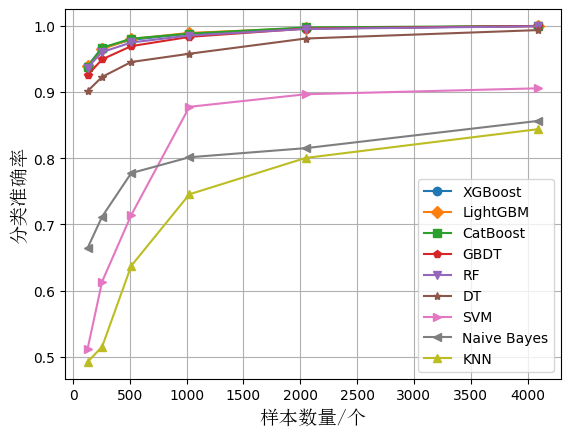

In [6]:
# plt.figure(figsize=(30, 15))
for alg, acc_list in accuracies.items():
    plt.plot(sizes, acc_list, label=alg, marker=markers[alg])
# plt.title('Comparison of Different ML Algorithms')
plt.xlabel('样本数量/个', fontproperties="SimSun",size=14)
plt.ylabel('分类准确率', fontproperties="SimSun",size=14)
plt.legend()
plt.grid(True)
plt.savefig('./imgs/sym.png',dpi=600, bbox_inches='tight')
plt.show()

In [10]:
# # 打印结果
# for size in sorted(results):
#     print(f"\nResults for data size {size}:")
#     for alg in sorted(results[size]):
#         print(f"  {alg}: Accuracy = {results[size][alg]:.4f}")

for alg, acc in accuracies.items():
    print(alg, str(acc))

XGBoost [0.93975, 0.967, 0.979, 0.98825, 0.996, 1.0]
LightGBM [0.939, 0.965, 0.98025, 0.9895, 0.99675, 0.99975]
CatBoost [0.93775, 0.967, 0.98075, 0.9885, 0.99775, 1.0]
GBDT [0.92575, 0.9495, 0.9695, 0.9835, 0.996, 1.0]
RF [0.937, 0.9605, 0.975, 0.9855, 0.9955, 0.9995]
DT [0.9015, 0.923, 0.9455, 0.958, 0.981, 0.99375]
SVM [0.51175, 0.6135, 0.714, 0.87775, 0.89675, 0.90575]
Naive Bayes [0.66425, 0.71175, 0.7775, 0.8015, 0.81525, 0.8565]
KNN [0.492, 0.515, 0.63725, 0.7455, 0.8005, 0.844]


In [ ]:
# acc = {alg: [] for alg in ['XGBoost', 'LightGBM', 'CatBoost', 'GBDT', 'RF', 'DT', 'SVM', 'Naive Bayes', 'KNN']}
# acc['XGBoost']=[0.95575, 0.96375, 0.977, 0.99025, 0.997, 0.99925]
# acc['LightGBM']=[0.95225, 0.961, 0.97575, 0.9915, 0.996, 0.9995]
# acc['CatBoost']=[0.94925, 0.9645, 0.97675, 0.99075, 0.99575, 0.99925]
# acc['GBDT']=[0.93275, 0.94975, 0.9655, 0.98725, 0.99575, 0.9995]
# acc['RF']=[0.9505, 0.95925, 0.972, 0.9895, 0.9955, 0.99925]
# acc['DT']=[0.92125, 0.9195, 0.93825, 0.971, 0.97575, 0.99375]
# acc['SVM']=[0.5275, 0.61075, 0.7355, 0.8725, 0.8935, 0.905]
# acc['Naive Bayes']=[0.649, 0.716, 0.77525, 0.79525, 0.8155, 0.857]
# acc['KNN']=[0.51075, 0.5385, 0.64825, 0.725, 0.80825, 0.842]

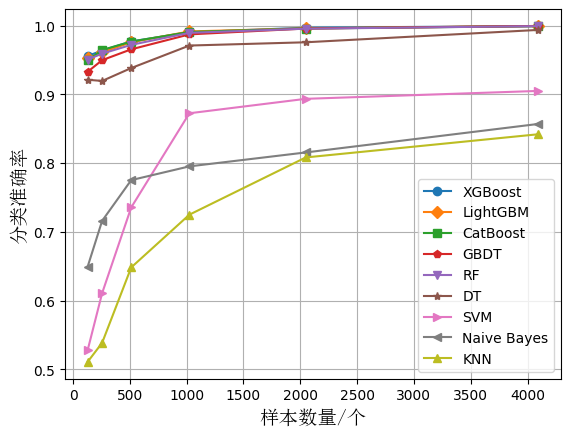

In [9]:
for alg, acc_list in acc.items():
    plt.plot(sizes, acc_list, label=alg, marker=markers[alg])
plt.xlabel('样本数量/个', fontproperties="SimSun",size=14)
plt.ylabel('分类准确率', fontproperties="SimSun",size=14)
plt.legend()
plt.grid(True)
plt.savefig('./imgs/sym_new.png',dpi=600, bbox_inches='tight')
plt.show()